 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [209]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [210]:
# Reading whale returns
whale_data = Path("Resources\whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date",parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [211]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [212]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [213]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col='Date', parse_dates=True)
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [214]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [215]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [216]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

C:\Users\afias\AppData\Local\Temp\ipykernel_30616\68312018.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_data, index_col="Date", parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [217]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [218]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [219]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [220]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [221]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns=["S&P500"]
sp500_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [222]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join = 'inner')
df_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

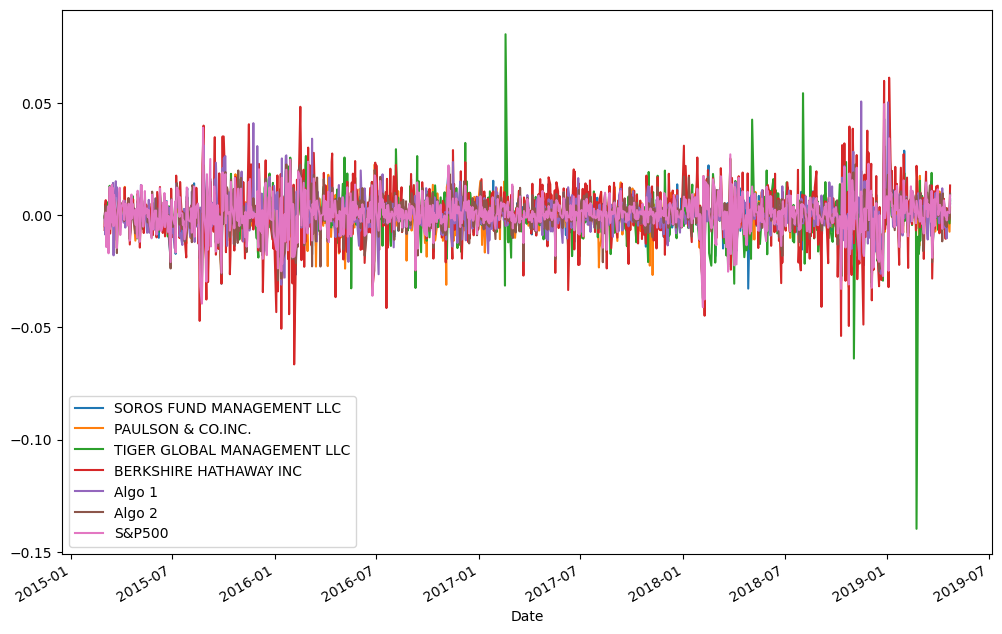

In [223]:
# Plot daily returns of all portfolios
df_combined.plot(figsize=(12,8))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

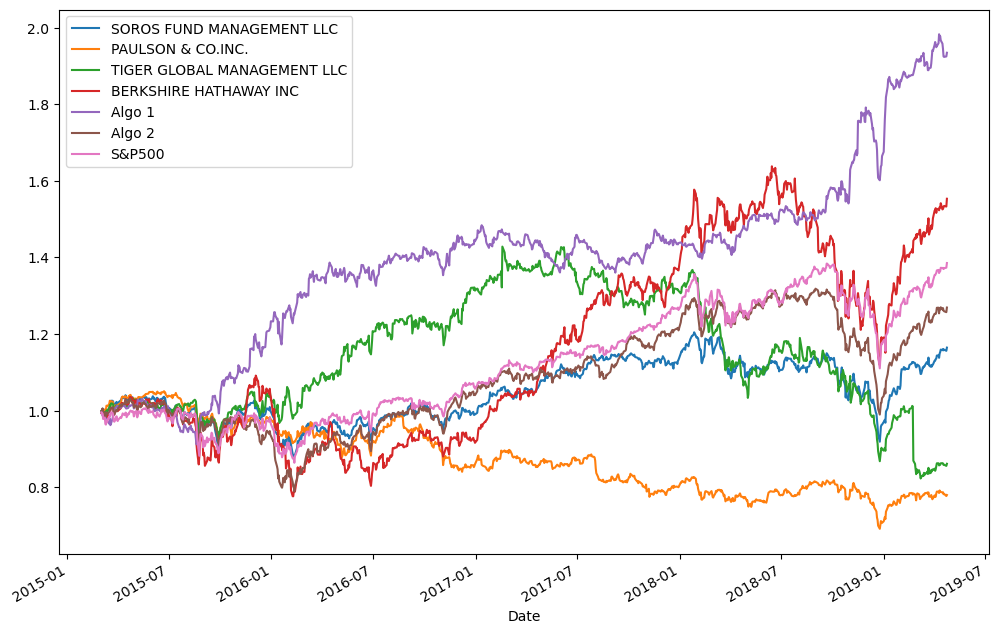

In [224]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df_combined).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

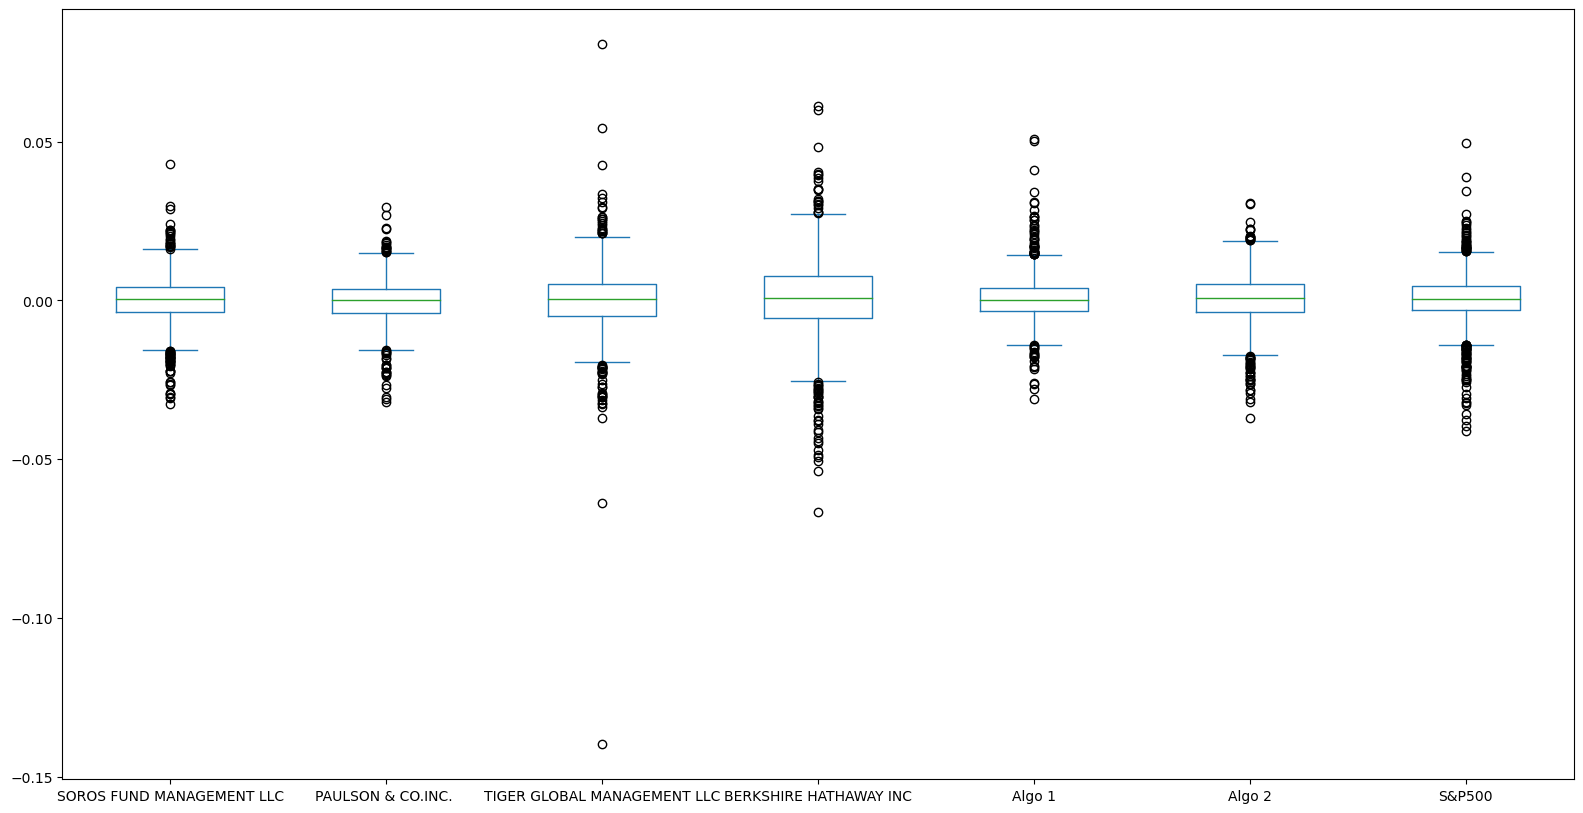

In [225]:
# Box plot to visually show risk
df_combined.plot(kind="box", figsize=(19.5,10))

### Calculate Standard Deviations

In [226]:
# Calculate the daily standard deviations of all portfolios
std_dev = df_combined.std()
std_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [227]:
# Calculate  the daily standard deviation of S&P 500
sp500_stddev = sp500_df.std()
sp500_stddev
# Determine which portfolios are riskier than the S&P 500
df_combined.std() > df_combined.std()["S&P500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [228]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = std_dev * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

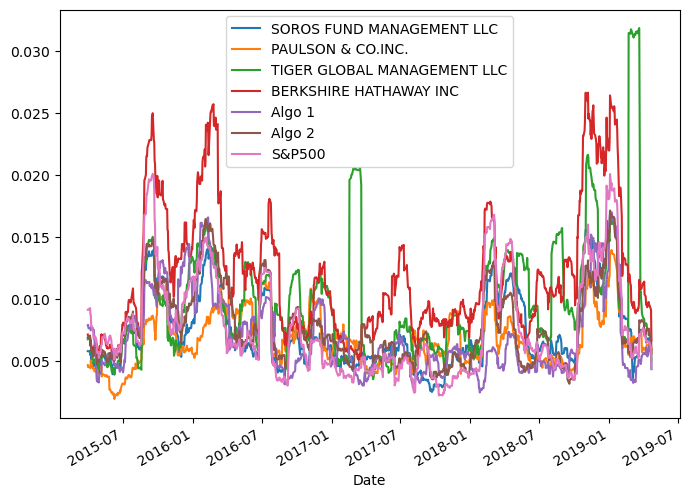

In [231]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_combined.rolling(window=21).std()
# Plot the rolling standard deviation
df_combined.rolling(window=21).std().plot(figsize=(8,6))

### Calculate and plot the correlation

<Axes: >

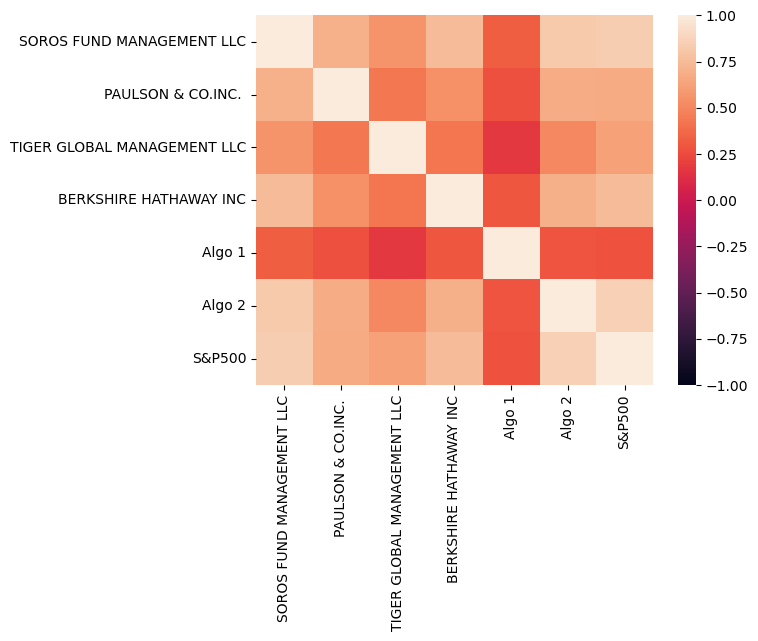

In [233]:
# Calculate the correlation
correlation = df_combined.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

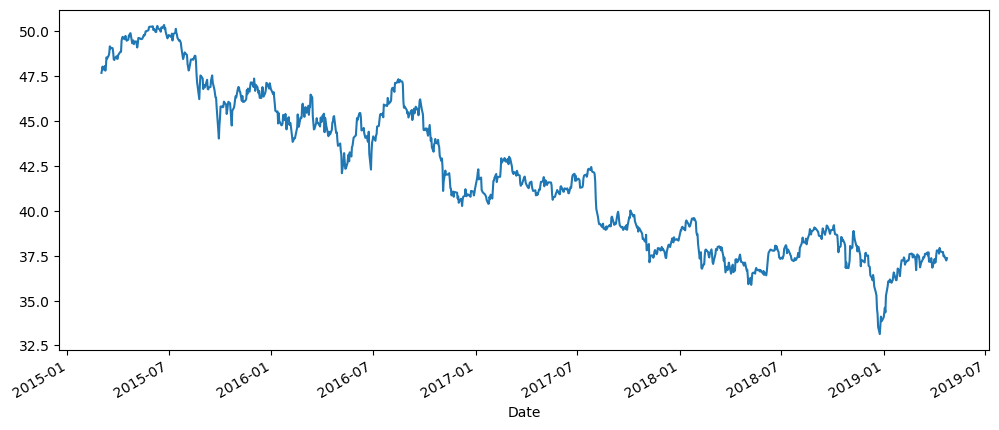

In [235]:
# Calculate covariance of a single portfolio
covariance =  cumulative_returns['PAULSON & CO.INC. ']
# Calculate variance of S&P 500
variance = cumulative_returns['S&P500'].var()
# Computing beta
b = covariance/variance
# Plot beta trend
b.plot(figsize=(12,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [280]:
# Use `ewm` to calculate the rolling window
df_combined.ewm(halflife=21).std().dropna()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,custom portfolio
Date,,,,,,,,
2018-05-15,0.010033,0.007122,0.012612,0.010515,0.005141,0.007344,0.010089,0.013151
2018-05-16,0.010001,0.007109,0.012458,0.010366,0.005093,0.007241,0.009945,0.010346
2018-05-17,0.009843,0.007011,0.012294,0.010247,0.005207,0.007170,0.009786,0.010481
2018-05-18,0.009710,0.006910,0.012279,0.010090,0.005132,0.007077,0.009642,0.009215
2018-05-21,0.009565,0.006799,0.012078,0.010087,0.005095,0.007002,0.009566,0.010826
...,...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837,0.012826
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736,0.012654
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610,0.012448


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [239]:
# Annualized Sharpe Ratios
sharpe_ratio = (df_combined.mean()*252)/ (annual_std)
sharpe_ratio.sort_values(ascending=False)

Algo 1                         1.378648
S&P500                         0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<Axes: >

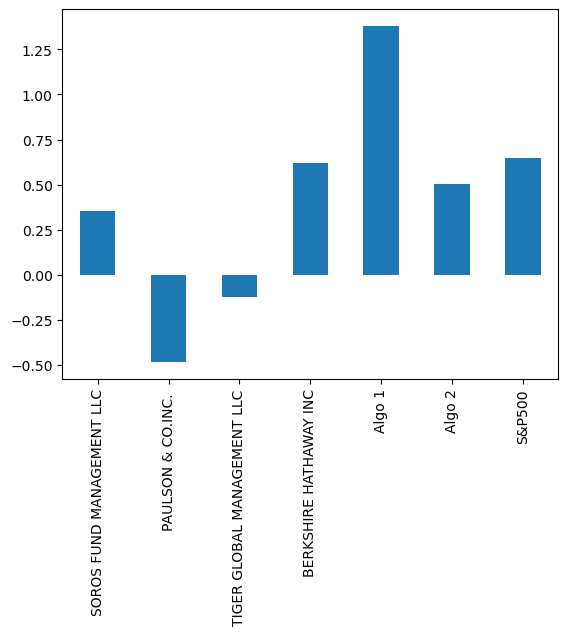

In [240]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [288]:
print('''Algo 1 outperformed both the market (S&P 500) and the whales portfolio\nwhereas Algo 2 underperformed the market(S&P500) and outperformed whales portfolio.''')

Algo 1 outperformed both the market (S&P 500) and the whales portfolio
whereas Algo 2 underperformed the market(S&P500) and outperformed whales portfolio.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [249]:
# Reading data from 1st stock

ba_data_path = Path("./Custom_portfolio/ba_historical.csv")
ba_hist = pd.read_csv(ba_data_path, index_col='Date', parse_dates=True)
ba_hist.head()


,Close
Date,
2019-05-09,354.13
2019-05-08,359.75
2019-05-07,357.23
2019-05-06,371.60
2019-05-03,376.46


In [250]:
# Reading data from 2nd stock
nvda_data_path = Path("./Custom_portfolio/nvda_historical.csv")
nvda_hist = pd.read_csv(nvda_data_path, index_col='Date', parse_dates=True)
nvda_hist.head()

,Close
Date,
2019-05-09,42.55
2019-05-08,43.48
2019-05-07,43.28
2019-05-06,44.96
2019-05-03,45.75


In [251]:
# Reading data from 3rd stock
pep_data_path = Path("./Custom_portfolio/pep_historical.csv")
pep_hist = pd.read_csv(pep_data_path, index_col='Date', parse_dates=True)
pep_hist.head()

,Close
Date,
2019-05-09,126.05
2019-05-08,126.02
2019-05-07,125.98
2019-05-06,127.27
2019-05-03,127.67


In [252]:
# Combine all stocks in a single DataFrame
combine_df = pd.concat([ba_hist, nvda_hist, pep_hist], axis=1, join='inner')
combine_df.head()

,Close,Close,Close
Date,,,
2019-05-09,354.13,42.55,126.05
2019-05-08,359.75,43.48,126.02
2019-05-07,357.23,43.28,125.98
2019-05-06,371.60,44.96,127.27
2019-05-03,376.46,45.75,127.67


In [254]:
# Reset Date index
combine_df.sort_index(inplace=True)
combine_df.head()

,Close,Close,Close
Date,,,
2018-05-11,342.46,63.63,97.43
2018-05-14,344.59,63.84,97.15
2018-05-15,342.12,61.39,96.80
2018-05-16,340.97,61.50,97.19
2018-05-17,344.14,61.93,97.92


In [255]:
# Reorganize portfolio data by having a column per symbol
combine_df.columns = ['BA','NVDA', 'PEP' ]
combine_df.head()

,BA,NVDA,PEP
Date,,,
2018-05-11,342.46,63.63,97.43
2018-05-14,344.59,63.84,97.15
2018-05-15,342.12,61.39,96.80
2018-05-16,340.97,61.50,97.19
2018-05-17,344.14,61.93,97.92


In [256]:
# Calculate daily returns
daily_return = combine_df.pct_change()
# Drop NAs
daily_return.dropna(inplace=True)
# Display sample data
daily_return.head()

,BA,NVDA,PEP
Date,,,
2018-05-14,0.006220,0.003300,-0.002874
2018-05-15,-0.007168,-0.038377,-0.003603
2018-05-16,-0.003361,0.001792,0.004029
2018-05-17,0.009297,0.006992,0.007511
2018-05-18,0.020602,-0.007105,-0.004187


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [257]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_return.dot(weights)
# Display sample data
portfolio_return.head()

Date
2018-05-14    0.002215
2018-05-15   -0.016383
2018-05-16    0.000820
2018-05-17    0.007933
2018-05-18    0.003103
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [258]:
# Join your returns DataFrame to the original returns DataFrame
#overall_portfolio = pd.concat([df_combined,daily_return], axis='columns', join='inner')
#overall_portfolio.head()
df_combined['custom portfolio'] = portfolio_return
overall_portfolio = df_combined
overall_portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,custom portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [259]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
overall_portfolio.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,custom portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.002215
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.016383
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.000820
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.007933
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.003103
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008468
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007229
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.000753


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [260]:
# Calculate the annualized `std`
annualized_std = overall_portfolio.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
custom portfolio               0.243958
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

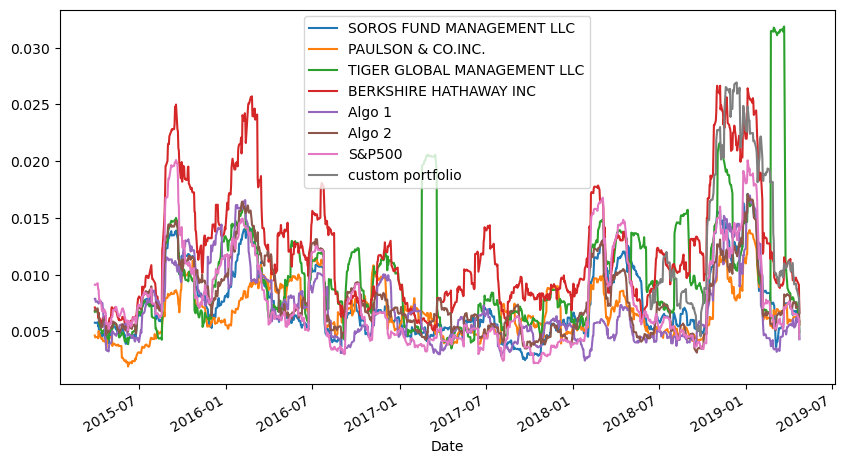

In [267]:
# Calculate rolling standard deviation
overall_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
overall_portfolio.rolling(window=21).std().plot(figsize=(10,5.5))


### Calculate and plot the correlation

<Axes: >

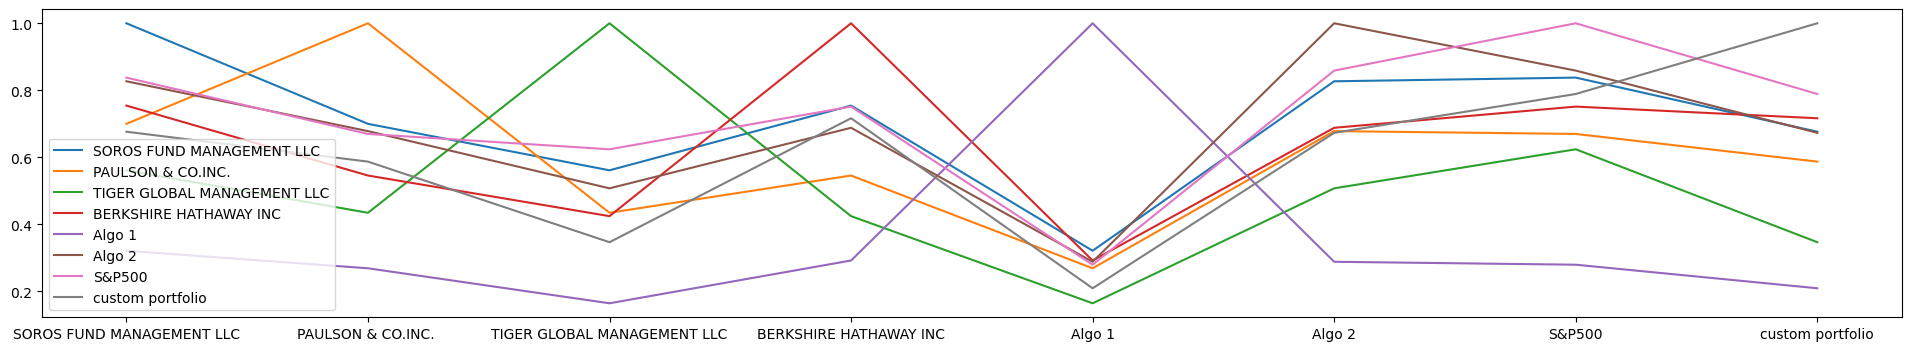

In [275]:
# Calculate and plot the correlation
overall_portfolio.corr().plot(figsize=(24,4))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

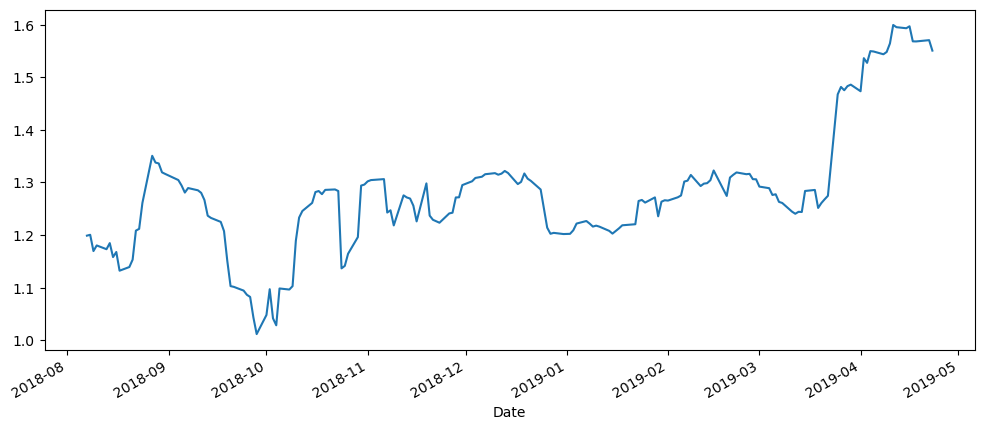

In [277]:
# Calculate and plot Beta
covariance_rolling = overall_portfolio['custom portfolio'].rolling(window=60).cov(overall_portfolio['S&P500'])
variance_rolling = overall_portfolio['S&P500'].rolling(window=60).var()
beta_calc = covariance_rolling / variance_rolling
beta_calc.plot(figsize=(12,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [278]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (overall_portfolio.mean()*252) / annualized_std
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
custom portfolio               0.360275
dtype: float64

<Axes: >

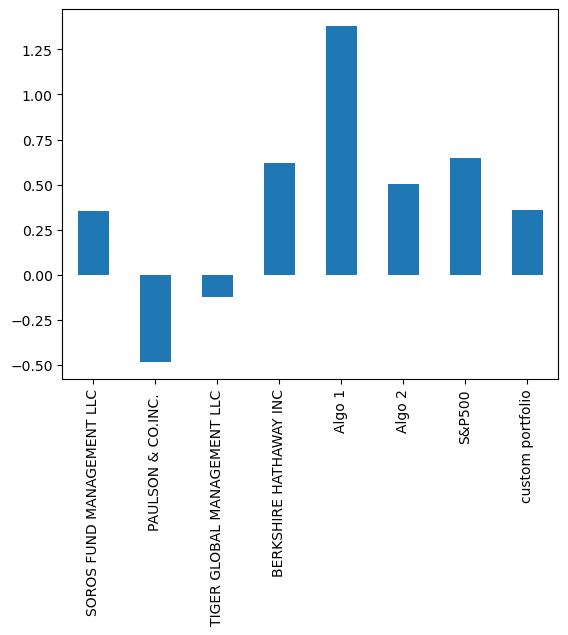

In [279]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

# How does your portfolio do?

Write your answer here!

In [294]:
print('''My custom portfolio outperformed Whales portfolio\nand underperformed in comparison to Algo 1 and 2, S&P500 and Berkshire Hathaway Inc.''')

My custom portfolio outperformed Whales portfolio
and underperformed in comparison to Algo 1 and 2, S&P500 and Berkshire Hathaway Inc.
